In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Shape of image: (512, 512)


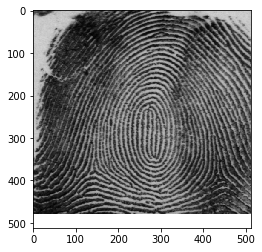

In [3]:
# read the file

img = cv2.imread('f0101_07.png',0)
#img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap = plt.cm.gray)
print ('Shape of image:',img.shape)

In [5]:
# Local block size w X w
w = 3

height = img.shape[0]
width = img.shape[1]



## 1. Saliency Features

In [55]:
# Feature 1


# This function will take a local block and compute the feature1 for that block.
#        For entire image, this function should be called for each local block.
#        It assumes that block size given as odd number, I have taken block size as 3.

def feature1(block,w,sigma=.5):
    result=0
    center_intensity = block[int(w/2),int(w/2)]
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            I_ij = block[i,j]
            index_i = i - w/2
            index_j = j - w/2
            result =  result + math.log(float(center_intensity)/float(I_ij))*math.exp(-(index_i**2+index_j**2)/sigma)
    return result
            
            
    



# number of blocks in horizontal 
block_hor = int(width/w)

# number of blocks in vertical
block_ver = int(height/w)


# Apply the feature1 function on entire imgage 
  # iterating over the image
for h in range(block_hor):
    for v in range(block_ver):
        
        # Computing the pixel location in the image for the first pixel in the local block
        start_x = h*w
        start_y = v*w
        
        # As the block size is taken as w, the ending pixel will be w pixel away from starting pixel
        end_x = start_x + w
        end_y = start_y + w
        
        
        # In the case of last block (in horizontal or vertical), the end pixel shall not w pixel away fromt he starting pixel
        if start_x+w > img.shape[0]:
            end_x = img.shape[0]
        if start_y+w > img.shape[1]:
            end_y = img.shape[1]
            
        #accessing current local block
        local_block = img[start_x:end_x,start_y:end_y]
        
        #computing feature1 for this block
        #f1 = feature1(local_block,w) 
        #print ('x:',h,'y:',v,':',f1)
        
        #computing feature3 
        #f3 = feature3(local_block,w,img.mean())
        #print ('x:',h,'y:',v,':',f3)
        
        f4 = feature3(local_block,w,img.mean())
        #print ('x:',h,'y:',v,':',f4)
        
    

In [ ]:
# Feature 2
def fetaure2(block,w):
    f = np.fft.fft2(block)
    fshift = np.fft.fftshift(f)
    
    

### 2. Image intensity-based features
This section contains code to generate feature3, feature4 and feature5. 

#### 2.1 Differences of Mean (feature3)

In [12]:
"""
 Function feature3 : This function computes feature 3 , differences in mean.
 Parameters
      block : Local image block
      w     : block size
      I_mean: Mean of entire image
"""
def feature3(block,w,I_mean):
    local_mean = block.mean()
    return local_mean - I_mean
    


#### 2.2 Variance (feature4)

In [15]:
"""
 Function feature4 : This function computes feature 4 , variances.
 Parameters
      block : Local image block
      w     : block size
      I_mean: Mean of entire image
"""
def feature4(block,w):
    return np.var(block)

#### 2.3 Ridge cluster value (feature5)

In [ ]:
"""
 Function feature5 : This function computes feature 5 , Ridge cluster value.
 Parameters
      block : Local image block
      w     : block size
      
"""
def v1(block,i,j,I_mean):
    if block[i,j] < I_mean:
        return 1
    else:
        return 0
    
def s(block)

### 3. Gradient-based features


#### 3.1 Ridge orientation (f6)

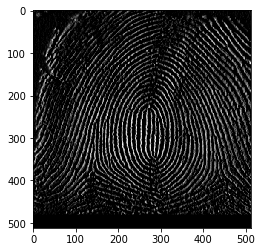

In [18]:
# compute gradient along x and y

kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])


I_x = cv2.filter2D(img,cv2.CV_8U,kernelx)
I_y = cv2.filter2D(img,cv2.CV_8U,kernely)

# Showing gradient in x direction
plt.imshow(I_x,cmap = plt.cm.gray)

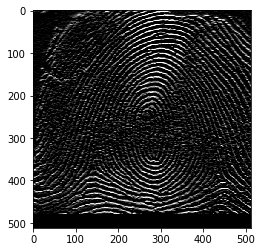

In [19]:
# Showing gradient in x direction
plt.imshow(I_y,cmap = plt.cm.gray)

This code can be used for computing ridge orientation
https://github.com/kjanko/python-fingerprint-recognition/blob/master/enhance/ridge_orient.py

#### 3.2 Sum of squared gradient


In [56]:

for h in range(block_hor):
    for v in range(block_ver):
        
        # Computing the pixel location in the image for the first pixel in the local block
        start_x = h*w
        start_y = v*w
        
        # As the block size is taken as w, the ending pixel will be w pixel away from starting pixel
        end_x = start_x + w
        end_y = start_y + w
        
        
        # In the case of last block (in horizontal or vertical), the end pixel shall not w pixel away fromt he starting pixel
        if start_x+w > img.shape[0]:
            end_x = img.shape[0]
        if start_y+w > img.shape[1]:
            end_y = img.shape[1]
        
        #accessing current local block
        local_C1 = C1[start_x:end_x,start_y:end_y]
        local_C2 = C2[start_x:end_x,start_y:end_y]
        
        local_Ix = I_x[start_x:end_x,start_y:end_y]
        local_Iy = I_y[start_x:end_x,start_y:end_y]
        
        
        
        # printing featuer 7
        f7 = feature7(local_C1,local_C2)
        #print(f7)
        
        # printing feature 8
        f8 = feature8(local_Ix,local_Iy)
        #print (f8)

In [38]:
"""
 Function feature7 : This function computes feature 7 , Sum of squared gradient
 Parameters
      block : Local image block
      w     : block size
      
"""
import math

C1 = I_x**2-I_y**2

C2 = np.multiply(I_x,I_y)
C2 = np.multiply(C2,2)


def feature7(C1,C2):
    c1 = np.sum(C1)
    c2 = np.sum(C2)
    return math.sqrt(c1**2+c2**2)

#### 3.3 Sum of norm of squared gradient vector (f8)

In [43]:
"""
 Function feature8 : This function computes feature 8 , Sum of norm of squared gradient vector
 Parameters
      block : Local image block
      w     : block size
      
"""

def feature8(block_Ix,block_Iy):
    first_term = np.subtract(np.square(block_Ix),np.square(block_Iy))
    first_term = np.square(first_term)
    
    second_term = np.multiply(block_Ix,block_Iy)
    second_term = np.square(np.multiply(second_term,2))
    
    return np.sum(np.sqrt(np.add(first_term,second_term)))
    
    
    

#### 3.4 Variance of projected axis parallel to orientation

#### 3.45Variance of projected axis orthogonal to orientation

#### 3.6 Mean of symmetry and texture patterns (f11 - f15)
For details, I have referred the paper [2].

I don't understand what is x and y and equation 23.

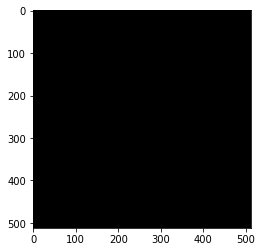

In [54]:
from scipy.ndimage import gaussian_filter

z = np.square(np.add(I_x,np.multiply(I_y,1j)))



def h_n(I_x,I_y,n):
    hn=0
    if n >= 0:
        hn = np.power(np.add(I_x,np.multiply(I_y,1j)),n)
    else:
        hn = np.power(np.add(I_x,np.multiply(I_y,1j)),(-1*n))
    return hn



### 4. Ridge based-features

#### 4.1 Average inter-ridge distance (f16)

### References
1. Anush Sankaran, Aayush Jain, Tarun Vashisth, Mayank Vatsa, Richa Singh, Adaptive Latent Fingerprint Segmentation using Feature Selection and Random Decision Forest Clas- sification, Information Fusion (2016), doi: 10.1016/j.inffus.2016.05.002

2. H. Choi, M. Boaventura, I. A. G. Boaventura and A. K. Jain, "Automatic segmentation of latent fingerprints," 2012 IEEE Fifth International Conference on Biometrics: Theory, Applications and Systems (BTAS), Arlington, VA, 2012, pp. 303-310. doi: 10.1109/BTAS.2012.6374593